In [11]:
from pymongo import MongoClient
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Connect to db collections
client = MongoClient('mongodb://localhost:27017/')
db = client['address-clustering']
transfers = db['transfers']
transactions = db['transactions']

In [48]:
# specify the address you want to search for
address = "0x4bCc68200C672BC6a5f43A118cAbf2507355839f".lower()

# create the query
query = { "$or": [ { "from": address }, { "to": address } ] }

# perform the query on the 'transactions' collection
transactions_df = pd.DataFrame(list(transactions.find(query)))
transfers_df = pd.DataFrame(list(transfers.find(query)))
all = pd.concat([transfers_df,transactions_df], ignore_index=True)
transfers_df

,_id,timeStamp,hash,from,to,contractAddress,value,nonce,tokenName,gasPrice,gasUsed,chainName,tokenType,tokenID,isSet,userAddress
0,64b3c671d2daf924bfebac18,1637698751,0x763eb96b3621a102e6b48802b56975cb2da65b221748...,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x0000000000000000000000000000000000000000,0xb4312305beefb7caef11432e74bcd5d9ebcdd992,4.0,572,BallerBars,125464498321,347346,Ethereum,20,,from,0x4bcc68200c672bc6a5f43a118cabf2507355839f
1,64b3c671d2daf924bfebac19,1637698955,0x12eb479df56c2d41f4b02d47b768a403e35341d98fe5...,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x0000000000000000000000000000000000000000,0xb4312305beefb7caef11432e74bcd5d9ebcdd992,4.0,573,BallerBars,118071412238,578009,Ethereum,20,,from,0x4bcc68200c672bc6a5f43a118cabf2507355839f
2,64b3c671d2daf924bfebac1b,1637699090,0x905a2442f6427d8c3d2b398c1983fc2dcd6b7e60c0f4...,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x0000000000000000000000000000000000000000,0xb4312305beefb7caef11432e74bcd5d9ebcdd992,4.0,575,BallerBars,121402187841,466029,Ethereum,20,,from,0x4bcc68200c672bc6a5f43a118cabf2507355839f
3,64b3c671d2daf924bfebac1d,1638148401,0xf218d0e5ce8f561445c0854b4cf2a488b652b685889d...,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x0000000000000000000000000000000000000000,0x649124c425f452f02de83bebb7fbca959cefd4ea,0.0,587,Banan,104088730488,177429,Ethereum,20,,from,0x4bcc68200c672bc6a5f43a118cabf2507355839f
4,64b3c671d2daf924bfebac21,1638932259,0x79d94f2ab67e9198cbced99fcbbc93a7f2d712a5557d...,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x0000000000000000000000000000000000000000,0x649124c425f452f02de83bebb7fbca959cefd4ea,0.0,611,Banan,84531345553,177429,Ethereum,20,,from,0x4bcc68200c672bc6a5f43a118cabf2507355839f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377,64b3c910d2daf924bfd78807,1688934547,0x97693b520fa9c85fc2c5e2bb9230a280a96deb387ce3...,0x0000000000000000000000000000000000000000,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0xd6a3f7b205da2baef3ebf48389aef09f4e208825,1,51,1000 $BLUR,89103128879,14570405,Polygon,1155,0,to,0x4bcc68200c672bc6a5f43a118cabf2507355839f
14378,64b3c910d2daf924bfd78808,1689029067,0x5e3084234d7a40c4f88ab05720873fff0d4fd5efbd41...,0x0000000000000000000000000000000000000000,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x46775c6498ade13ebeec55b21d1228f4733537e7,1,104,APE NFT TICKETS,152177262776,26235736,Polygon,1155,6515,to,0x4bcc68200c672bc6a5f43a118cabf2507355839f
14379,64b3c910d2daf924bfd78809,1689024649,0x92ca3c12eef020b7175816a62c9aafd4e8e9f663d46c...,0x0000000000000000000000000000000000000000,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0x18735c5411d54ca5b347f61efb55d939cbedd47c,1,167,1000 $BLUR,162392611883,14738609,Polygon,1155,0,to,0x4bcc68200c672bc6a5f43a118cabf2507355839f
14380,64b3c910d2daf924bfd7880a,1689046252,0x07ba6015d05ff547e9f20bb91e9e6704d3174ea3a95b...,0x60484fe1accaf44b0fa4413c8b0aa0c4387f4114,0x4bcc68200c672bc6a5f43a118cabf2507355839f,0xba4e2199540862e0e451db65879e922a438a0a8c,1,179,POLKADOT EVENT,127165939384,3594573,Polygon,1155,0,to,0x4bcc68200c672bc6a5f43a118cabf2507355839f


In [51]:
import random
G = nx.from_pandas_edgelist(transfers_df, 'from', 'to', create_using=nx.MultiDiGraph())

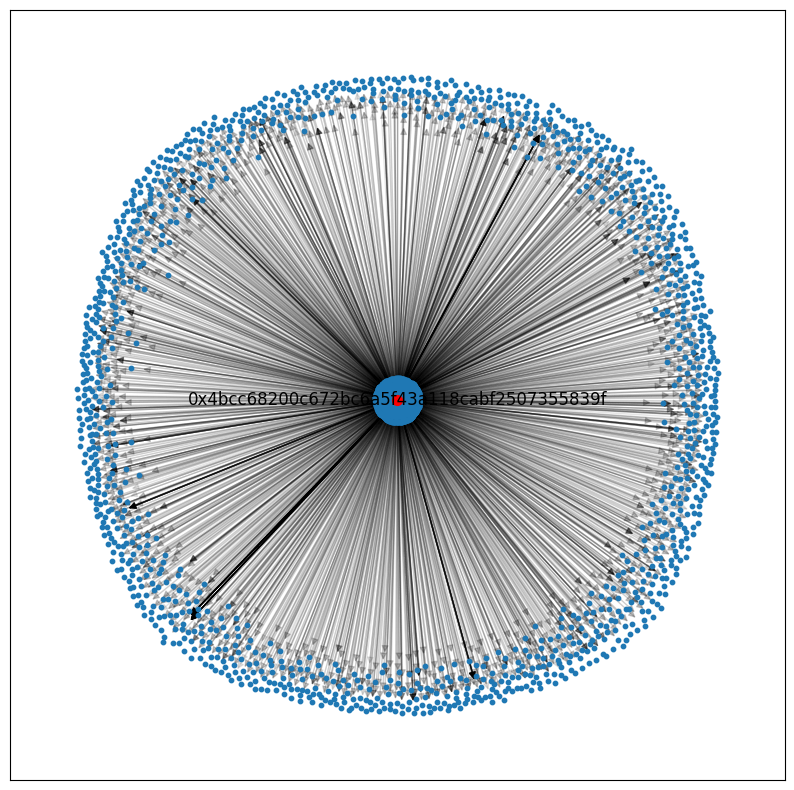

In [57]:
# Find the node with the most out-degrees
out_degrees = dict(G.out_degree())
max_out_degree_node = max(out_degrees, key=out_degrees.get)

# Create layout for visualizing graph
pos = nx.spring_layout(G, scale = 10, k= 0.15)

fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=10, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.1, ax=ax)


# Highlight the node with the most out-degrees
nx.draw_networkx_nodes(G, pos, nodelist=[max_out_degree_node], node_color='r', node_size=50, ax=ax)
nx.draw_networkx_labels(G, pos, labels={max_out_degree_node: max_out_degree_node}, font_size=12, font_color='k', ax=ax)


plt.show()

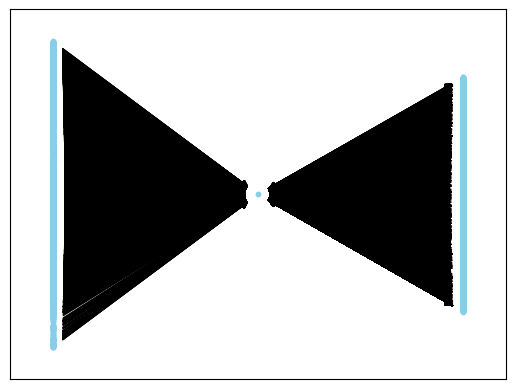

In [60]:
# Let's consider that your graph is G and hub node is '0x4bcc..'

hub_node = '0x4bcc68200c672bc6a5f43a118cabf2507355839f'

in_nodes = [n for n in G.predecessors(hub_node)]
out_nodes = [n for n in G.successors(hub_node)]

# Create position map
pos = {}

# Position for hub_node
pos[hub_node] = (0, 0)

# Positions for in_nodes on the left
for i, node in enumerate(in_nodes):
    pos[node] = (-1, i - len(in_nodes)/2)

# Positions for out_nodes on the right
for i, node in enumerate(out_nodes):
    pos[node] = (1, i - len(out_nodes)/2)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw node labels
#nx.draw_networkx_labels(G, pos)

plt.show()